# Loading Dataset

## Importing Libraries

In [1050]:
#importint the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from dotenv import dotenv_values,load_dotenv
import os


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## Adding Commas to CSV

In [1051]:
#Copia que si es csv
f = open("./Datasets/marketing_campaign_copy.csv", "x")
with open('./Datasets/marketing_campaign.csv', "r+") as csv_file: 
    for line in csv_file:
        new_line = line.replace("\t", ",")  
        f.write(new_line)
f.close() 

FileExistsError: [Errno 17] File exists: './Datasets/marketing_campaign_copy.csv'

## Loading Dataset

In [1211]:
#Cargar el dataset 
df = pd.read_csv('./Datasets/marketing_campaign_copy.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Checking Data

In [1212]:
Education_lst = df['Education'].tolist()
MS_lst = df['Marital_Status'].tolist()

def Show_Repited_Cases(lst):
    cases_lst = []
    for element in lst: 
        if element not in cases_lst:
            cases_lst.append(element)
    print(cases_lst)
        
Show_Repited_Cases(MS_lst)
Show_Repited_Cases(Education_lst)

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']


In [1213]:
col_names = list(df.columns) 
#print(col_names)

#debe ser formato numpy array
x = df[col_names]
x = x.values
print(type(x))
#debe ser formato list
y = df.Response
y = y.values.tolist()
print(type(y))

<class 'numpy.ndarray'>
<class 'list'>


In [1214]:
Education_lst = df['Education'].tolist()
MS_lst = df['Marital_Status'].tolist()

def Show_Repited_Cases(lst):
    cases_lst = []
    for element in lst: 
        if element not in cases_lst:
            cases_lst.append(element)
    print(cases_lst)
        
Show_Repited_Cases(MS_lst)
Show_Repited_Cases(Education_lst)

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']


In [1215]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [1216]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Data Modifications

In [1217]:
#adding Total Spending Amount
df['Total_Spending'] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

#Changing Strings from Education
labels = []
for value in df['Education']:
    if value == 'Graduation':
        labels.append(0)
    elif value == 'Master' or  value =="2n Cycle":
        labels.append(1)
    elif value == 'PhD':
        labels.append(2)
    else:
        labels.append(3)
df.loc[:, 'Education'] = labels
df["Education"] = df["Education"].astype("int64")
#Changing Strings from Marital Status
labels = []
for value in df['Marital_Status']:
    if value == 'Married':
        labels.append(5)
    elif value == 'Widow':
        labels.append(4)
    elif value == 'Separated':
        labels.append(3)
    elif value == 'Divorced':
        labels.append(2)
    elif value == 'Single':
        labels.append(1)
    else:
        labels.append(0)
df.loc[:, 'Marital_Status'] = labels
df["Marital_Status"] = df["Marital_Status"].astype("int64")
#Changin Year of Bith to Age 2023
labels = []
for value in df['Year_Birth']:
    labels.append(2023 - int(value))

df.loc[:, 'Year_Birth'] = labels

labels = []
for value in df['Dt_Customer']:  
    new_date = pd.Timestamp(value)
    labels.append(new_date)
df.loc[:, 'Dt_Customer'] = labels
df["Dt_Customer"] = df["Dt_Customer"].astype("datetime64[ns]")

df["Income"] = df["Income"].astype("int64")

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending
0,5524,66,0,1,58138,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,69,0,1,46344,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,58,0,0,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,39,0,0,26646,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,42,2,5,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,0,5,61223,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,77,2,0,64014,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,42,0,2,56981,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,67,1,0,69245,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,843


## Dataframe Describe

In [1218]:
df_describe = df[list(df.columns)]
df_describe.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,54.194196,0.762054,2.487500,52237.970089,0.444196,0.506250,2013-07-11 22:57:38.571428608,49.109375,303.935714,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214
min,0.000000,27.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2828.250000,46.000000,0.000000,0.000000,35538.750000,0.000000,0.000000,2013-01-19 18:00:00,24.000000,23.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000
50%,5458.500000,53.000000,0.000000,2.000000,51381.000000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,173.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000
75%,8427.750000,64.000000,1.000000,5.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000
max,11191.000000,130.000000,3.000000,5.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000
std,3246.662198,11.984069,0.871917,2.153101,25037.956074,0.538398,0.544538,NaN,28.962453,336.597393,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288


- mean = Media es el promedio de los datos
- std = La desviación estándar mide la dispersión de una distribución de datos
- 25% = El primer cuartil Q1, es el valor en el cual o por debajo del cual queda aproximadamente un cuarto (25%) de todos los valores de la sucesión (ordenada)
- 50% = El segundo cuartil Q2 es el valor por debajo del cual queda el 50% de los datos (Mediana)
- 75% =el tercer cuartil Q3 es el valor por debajo del cual quedan las tres cuartas partes (75%) de los datos.
MAX y Min : valores mayor y menor

# Analisis Univariado

## Create_Plot Function

In [ ]:
def Create_Plot(var, var_title):
# Ajustes de la figura de Matplotlib
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)
    #print(ax[0])
    
    
    # Plotea el histograma
    sns.histplot(data=df[var], ax=ax[0], kde=False)
    ax[0].set_xlabel(var_title)
    ax[0].set_ylabel('Frecuencia')
    
    
    # Plotea la curva de densidad
    sns.kdeplot(data=df[var], ax=ax[1], fill=True)
    ax[1].set_xlabel(var_title)
    ax[1].set_ylabel('Densidad')
    
    fig.suptitle('Análisis Univariado de la variable: ' + var)
    
    plt.tight_layout()

## Edad

In [ ]:
var = "Year_Birth"
var_title = "Customer's Age"
Create_Plot(var, var_title)

## Educacion

In [ ]:
var = "Education"
var_title = "Customer's education level"
Create_Plot(var, var_title)

## Estado Civil

In [ ]:
var = "Marital_Status"
var_title = "Customer's marital status"
Create_Plot(var, var_title)

## Ingresos $$

In [ ]:
var = "Income"
var_title = "Customer's yearly household income"
Create_Plot(var, var_title)

## Hijos

In [ ]:
var = "Kidhome"
var_title = "Number of children in customer's household"
Create_Plot(var, var_title)

In [ ]:
var = "Teenhome"
var_title = "Number of children in customer's household"
Create_Plot(var, var_title)

## Fecha de inscripcion

In [ ]:
var = "Dt_Customer"
var_title = "Customer's Age"


# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharex=True)
#print(ax[0])


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], shrink=0.8, kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la variable: ' + var)

plt.tight_layout()

## Ultima Compra

In [ ]:
var = "Recency"
var_title = "Number of days since customer's last purchase"
Create_Plot(var, var_title)

## Quejas

In [ ]:
var = "Complain"
var_title = "1 if the customer complained in the last 2 years, 0 otherwise"
Create_Plot(var, var_title)

In [ ]:
row, col = df.shape

no_complain_count =0
for value in df['Complain']:
    if value == 0:
        no_complain_count += 1

print (col)
print (no_complain_count)

amount_spent_df = pd.DataFrame(
    {
        'Percentage': [row - no_complain_count, no_complain_count]},
        index = ['Have_Complain', 'No_Complain']
    )

plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))

## Product Plots

In [ ]:
columns = list(df.columns)[9:15]

for column in columns:
    var_title = "Amount spent on " + column[3:] + "(Last 2 Years)"
    Create_Plot(column, var_title)


## Purchases Plots

In [ ]:
columns = list(df.columns)[15:19]

for column in columns:
    var_title = "Total of " + column[3:] + "(Last Month)"
    Create_Plot(column, var_title)

In [ ]:
row, col = df.shape

deal_purchases =0
for value in df['NumDealsPurchases']:
    if value == 1:
        deal_purchases += 1

print (row)
print (deal_purchases)

amount_spent_df = pd.DataFrame(
    {
        'Percentage': [row - deal_purchases, deal_purchases]},
        index = ['No Purchases with Deal', 'Purchases with Deal']
    )

plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))

# Analisis Multivariado

In [ ]:
#Longitud del Sépalo vs Especies
var = 'Education_Str'
var_title = 'Highest Level of Academic Degree'

labels = []
for value in df['Education']:
    if value == 0:
        labels.append('Graduation')
    elif value == 1:
        labels.append('Master')
    elif value == 2:
        labels.append('PhD')
    else:
        labels.append('Others')
        
df.insert(29, "Education_Str", labels, True)

labels = []
for value in df['Marital_Status']:
    if value == 5:
        labels.append('Married')
    elif value == 4:
        labels.append('Widow')
    elif value == 3:
        labels.append('Separated')
    elif value == 2:
        labels.append('Divorced')
    elif value == 1:
        labels.append('Single')
    else:
        labels.append('Others')
df.insert(30, "Marital_Status_Str", labels, True)

filter = (df['Response'] == 0)
df_pos_response = df.loc[filter]
    
filter = (df['Response'] == 1)
df_neg_response = df.loc[filter]

## Age vs Academic Level (Frequency and Density)

In [ ]:
#Filtering by Education Level
filter = (df['Education'] == 0)
df_graduate = df.loc[filter]
    
filter = (df['Education'] == 1)
df_masters = df.loc[filter]

filter = (df['Education'] == 2)
df_PhD = df.loc[filter]
    
filter = (df['Education'] == 3)
df_others = df.loc[filter]

In [ ]:
#Longitud del Sépalo vs Especies
var = 'Year_Birth'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
    
# Histograma para cada especie
sns.histplot(data=df_graduate, x=var, label="Graduate", kde=False, ax=ax[0])
sns.histplot(data=df_masters, x=var, label="Master", kde=False, ax=ax[0])
sns.histplot(data=df_PhD, x=var, label="PhD", kde=False, ax=ax[0])
sns.histplot(data=df_others, x=var, label="Others", kde=False, ax=ax[0])
ax[0].set_xlabel("Age vs Academic Level")
ax[0].set_ylabel('Frequency')
    
# Curva de densidad para cada especie
sns.kdeplot(data=df_graduate, x=var, label="Graduate", fill=True, ax=ax[1])
sns.kdeplot(data=df_masters, x=var, label="Master", fill=True, ax=ax[1])
sns.kdeplot(data=df_PhD, x=var, label="PhD", fill=True, ax=ax[1])
sns.kdeplot(data=df_others, x=var, label="Others", fill=True, ax=ax[1])
ax[1].set_xlabel("Age vs Academic Level")
ax[1].set_ylabel('Density')
ax[1].legend()
    
plt.tight_layout()

## Academic Level vs Income

In [ ]:
#Longitud del Sépalo vs Especies
var = 'Income'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
    
# Histograma para cada especie
sns.histplot(data=df_graduate, x=var, label="Graduate", kde=False, ax=ax[0])
sns.histplot(data=df_masters, x=var, label="Master", kde=False, ax=ax[0])
sns.histplot(data=df_PhD, x=var, label="PhD", kde=False, ax=ax[0])
sns.histplot(data=df_others, x=var, label="Others", kde=False, ax=ax[0])
ax[0].set_xlabel("Academic Level vs Income")
ax[0].set_ylabel('Frequency')
    
# Curva de densidad para cada especie
sns.kdeplot(data=df_graduate, x=var, label="Graduate", fill=True, ax=ax[1])
sns.kdeplot(data=df_masters, x=var, label="Master", fill=True, ax=ax[1])
sns.kdeplot(data=df_PhD, x=var, label="PhD", fill=True, ax=ax[1])
sns.kdeplot(data=df_others, x=var, label="Others", fill=True, ax=ax[1])
ax[1].set_xlabel("Academic Level vs Income")
ax[1].set_ylabel('Density')
ax[1].legend()
    
plt.tight_layout()

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
# Histograma para cada especie
sns.histplot(data=df_graduate, x=var, label="Graduate", kde=False, ax=ax[0])
sns.histplot(data=df_masters, x=var, label="Master", kde=False, ax=ax[0])
sns.histplot(data=df_PhD, x=var, label="PhD", kde=False, ax=ax[0])
sns.histplot(data=df_others, x=var, label="Others", kde=False, ax=ax[0])
ax[0].set_xlabel("Academic Level vs Income")
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(0,200000)

# Curva de densidad para cada especie
sns.kdeplot(data=df_graduate, x=var, label="Graduate", fill=True, ax=ax[1])
sns.kdeplot(data=df_masters, x=var, label="Master", fill=True, ax=ax[1])
sns.kdeplot(data=df_PhD, x=var, label="PhD", fill=True, ax=ax[1])
sns.kdeplot(data=df_others, x=var, label="Others", fill=True, ax=ax[1])
ax[1].set_xlabel("Academic Level vs Income")
ax[1].set_ylabel('Density')
ax[1].legend()
    
plt.tight_layout()

## Marital Status vs Academic Level

In [ ]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
    
# Histograma para cada especie
sns.histplot(data=df_pos_response, x=var, hue="Marital_Status_Str", multiple="dodge", shrink=.8, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Positive Response')
    
# Curva de densidad para cada especie
sns.histplot(data=df_neg_response, x=var, hue="Marital_Status_Str", multiple="dodge", shrink=0.8, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Negative Response')
ax[1].legend()
    
plt.tight_layout()

## Wine vs Academic Level vs Marital Status

In [ ]:
#Longitud del Sépalo vs Especies
var = 'Education_Str'
var_title = 'Academic Level'

#Longitud del Sépalo vs Especies
filter = (df['MntWines'] == 0)
df_no_wine = df.loc[filter]
    
filter = (df['MntWines'] != 0)
df_wine_amount = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
# Ajustes de la figura de Matplotlib
sns.histplot(data=df_wine_amount, x=var, hue="Marital_Status_Str", multiple="dodge", shrink=.8, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Customers that have bought Wine')

sns.histplot(data=df_no_wine, x=var, hue="Marital_Status_Str", multiple="dodge", shrink=.8, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Customers that have not bought Wine')

plt.tight_layout()

In [ ]:
#Longitud del Sépalo vs Especies
var = 'Education_Str'
var_title = 'Academic Level'

#Longitud del Sépalo vs Especies
filter = (df['MntWines'] == 0)
df_no_wine = df.loc[filter]
    
filter = (df['MntWines'] != 0)
df_wine_amount = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(15, 4))
    
# Histograma para cada especie
sns.histplot(data=df_wine_amount, x=var, label="Negative Response", kde=False)
    
plt.tight_layout()

## Promotions vs Purchases with Deals

In [ ]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#Longitud del Sépalo vs Especies
var = 'NumDealsPurchases'
var_title = 'Purchases with a discount'

filter = df['AcceptedCmp1'] == 1
df_AcceptedCmp1 = df.loc[filter]
filter = (df['AcceptedCmp2'] == 1)
df_AcceptedCmp2 = df.loc[filter]
filter = (df['AcceptedCmp3'] == 1)
df_AcceptedCmp3 = df.loc[filter]
filter = (df['AcceptedCmp4'] == 1)
df_AcceptedCmp4 = df.loc[filter]
filter = (df['AcceptedCmp5'] == 1)
df_AcceptedCmp5 = df.loc[filter]
filter = (df['Response'] == 1)
df_Response = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_AcceptedCmp1, x=var, label="AcceptedCmp1", kde=False, ax=ax[0])
sns.histplot(data=df_AcceptedCmp2, x=var, label="AcceptedCmp2", kde=False, ax=ax[0])
sns.histplot(data=df_AcceptedCmp3, x=var, label="AcceptedCmp3", kde=False, ax=ax[0])
sns.histplot(data=df_AcceptedCmp4, x=var, label="AcceptedCmp4", kde=False, ax=ax[0])
sns.histplot(data=df_AcceptedCmp5, x=var, label="AcceptedCmp5", kde=False, ax=ax[0])
sns.histplot(data=df_Response    , x=var, label="Response"    , kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_AcceptedCmp1, x=var, label="AcceptedCmp1", fill=True, ax=ax[1])
sns.kdeplot(data=df_AcceptedCmp2, x=var, label="AcceptedCmp2", fill=True, ax=ax[1])
sns.kdeplot(data=df_AcceptedCmp3, x=var, label="AcceptedCmp3", fill=True, ax=ax[1])
sns.kdeplot(data=df_AcceptedCmp4, x=var, label="AcceptedCmp4", fill=True, ax=ax[1])
sns.kdeplot(data=df_AcceptedCmp5, x=var, label="AcceptedCmp5", fill=True, ax=ax[1])
sns.kdeplot(data=df_Response    , x=var, label="Response"    , fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## Scatter Plot, Amount Spent on Wine vs Income per Marital Status

In [ ]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="MntWines", y="Income", ax=ax, hue="Marital_Status")
plt.tight_layout()

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="MntWines", y="Income", ax=ax, hue="Marital_Status")
ax.set_ylim(0,170000)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="MntFruits", y="Income", ax=ax, hue="Marital_Status")
plt.tight_layout()

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="MntFruits", y="Income", ax=ax, hue="Marital_Status")
ax.set_ylim(0,170000)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Income", y="MntGoldProds", ax=ax, hue="Marital_Status")
plt.tight_layout()

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Income", y="MntGoldProds", ax=ax, hue="Marital_Status")
ax.set_xlim(0,170000)
plt.tight_layout()

## Total Amount Spent Pie Chart

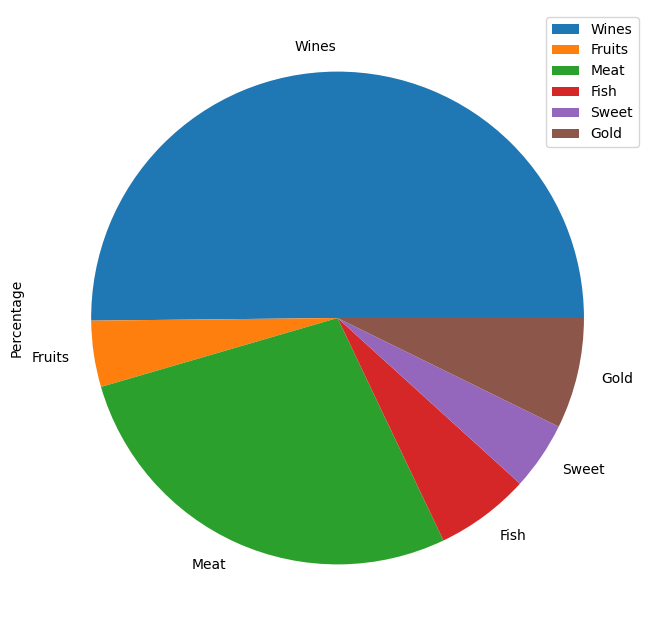

In [1145]:
percentage_lst = []
wines_percentage = df["MntWines"].sum() / df["Total_Spending"].sum()
percentage_lst.append(wines_percentage)

fruits_percentage = df["MntFruits"].sum() / df["Total_Spending"].sum()
percentage_lst.append(fruits_percentage)

MeatProducts_percentage = df["MntMeatProducts"].sum() / df["Total_Spending"].sum()
percentage_lst.append(MeatProducts_percentage)

FishProducts_percentage = df["MntFishProducts"].sum() / df["Total_Spending"].sum()
percentage_lst.append(FishProducts_percentage)

SweetProducts_percentage = df["MntSweetProducts"].sum() / df["Total_Spending"].sum()
percentage_lst.append(SweetProducts_percentage)

GoldProducts_percentage = df["MntGoldProds"].sum() / df["Total_Spending"].sum()
percentage_lst.append(GoldProducts_percentage)


amount_spent_df = pd.DataFrame(
    {
        'Percentage':percentage_lst},
        index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    )

plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))

## Amount Spent per Graduate

In [ ]:
#Longitud del Sépalo vs Especies
filter = (df['Education'] == 0)
df_graduate = df.loc[filter]

percentage_lst = []
wines_percentage = df_graduate["MntWines"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(wines_percentage)

fruits_percentage = df_graduate["MntFruits"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(fruits_percentage)

MeatProducts_percentage = df_graduate["MntMeatProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(MeatProducts_percentage)

FishProducts_percentage = df_graduate["MntFishProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(FishProducts_percentage)

SweetProducts_percentage = df_graduate["MntSweetProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(SweetProducts_percentage)

GoldProducts_percentage = df_graduate["MntGoldProds"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(GoldProducts_percentage)


amount_spent_df = pd.DataFrame(
    {
        'Percentage':percentage_lst},
        index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    )
print(amount_spent_df)
plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))

## Amount Spent per Single

In [ ]:
#Longitud del Sépalo vs Especies
filter = (df['Marital_Status'] == 1)
df_graduate = df.loc[filter]

percentage_lst = []
wines_percentage = df_graduate["MntWines"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(wines_percentage)

fruits_percentage = df_graduate["MntFruits"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(fruits_percentage)

MeatProducts_percentage = df_graduate["MntMeatProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(MeatProducts_percentage)

FishProducts_percentage = df_graduate["MntFishProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(FishProducts_percentage)

SweetProducts_percentage = df_graduate["MntSweetProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(SweetProducts_percentage)

GoldProducts_percentage = df_graduate["MntGoldProds"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(GoldProducts_percentage)


amount_spent_df = pd.DataFrame(
    {
        'Percentage':percentage_lst},
        index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    )
print(amount_spent_df)
plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))

##  WebPurchases vs Age

In [ ]:
var = 'NumWebPurchases'
var_title = 'WebPurchases vs Age'

labels = []
for value in df['Year_Birth']:
    if value >= 0 and value < 20:
        labels.append('0-20')
    elif value >= 20 and value < 40:
        labels.append('20-40')
    elif value >= 40 and value < 60:
        labels.append('40-60')
    else:
        labels.append('60-80')
df.insert(28, "Age_Range", labels, True)

filter = df['Age_Range'] == '60-80'
df_6080_range = df.loc[filter]
filter = df['Age_Range'] == '40-60'
df_4060_range = df.loc[filter]
filter = df['Age_Range'] == '20-40'
df_2040_range = df.loc[filter]
filter = (df['Age_Range'] == '0-20')
df_020_range = df.loc[filter]

df = df.drop('Age_Range', axis=1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_6080_range, x=var, label="60-80", kde=False, ax=ax[0])
sns.histplot(data=df_4060_range, x=var, label="40-60", kde=False, ax=ax[0])
sns.histplot(data=df_2040_range, x=var, label="20-40", kde=False, ax=ax[0])
sns.histplot(data=df_020_range, x=var,  label= "0-20", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

sns.kdeplot(data=df_6080_range, x=var, label="60-80", fill=True, ax=ax[1])
sns.kdeplot(data=df_4060_range, x=var, label="40-60", fill=True, ax=ax[1])
sns.kdeplot(data=df_2040_range, x=var, label="20-40", fill=True, ax=ax[1])
sns.kdeplot(data=df_020_range, x=var,  label= "0-20", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()


plt.tight_layout()

# Correlacion

In [1219]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending
0,5524,66,0,1,58138,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,69,0,1,46344,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,58,0,0,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,39,0,0,26646,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,42,2,5,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,0,5,61223,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,77,2,0,64014,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,42,0,2,56981,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,67,1,0,69245,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,843


In [1220]:
#Eliminando columna que yo cree 
#df = df.drop('Total_Spending', axis=1)
df['Num_Kids']  = df['Kidhome'] + df['Teenhome']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#eliminando mayores de 90 
filter = (df['Year_Birth'] <= 90)
df = df.loc[filter]
#eliminando ingresos mayores de 300K 
filter = (df['Income'] <= 300000)
df = df.loc[filter]

#eliminando mayores de 90 
filter = (df['NumWebVisitsMonth'] < 11)
df = df.loc[filter]
#eliminando ingresos mayores de 300K 
filter = (df['NumWebPurchases'] < 20)
df = df.loc[filter]
#eliminando ingresos mayores de 300K 
filter = (df['NumCatalogPurchases'] < 20)
df = df.loc[filter]


In [1221]:
#Not sure how it is related to the Data Set
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)

#Removing only a small per centage of the customers complain
df = df.drop('Complain', axis=1)
#ID relevant? 
df = df.drop('ID', axis=1)
#Dt_Customer relevant? 
df = df.drop('Dt_Customer', axis=1)

In [1222]:
#df = df = df.drop('Kidhome', axis=1)
#df = df = df.drop('Teenhome', axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Spending,Num_Kids,TotalAcceptedCmp
0,66,0,1,58138,0,0,58,635,88,546,...,7,0,0,0,0,0,1,1617,0,1
1,69,0,1,46344,1,1,38,11,1,6,...,5,0,0,0,0,0,0,27,2,0
2,58,0,0,71613,0,0,26,426,49,127,...,4,0,0,0,0,0,0,776,0,0
3,39,0,0,26646,1,0,26,11,4,20,...,6,0,0,0,0,0,0,53,1,0
4,42,2,5,58293,1,0,94,173,43,118,...,5,0,0,0,0,0,0,422,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,0,5,61223,0,1,46,709,43,182,...,5,0,0,0,0,0,0,1341,1,0
2236,77,2,0,64014,2,1,56,406,0,30,...,7,0,0,0,1,0,0,444,3,1
2237,42,0,2,56981,0,0,91,908,48,217,...,6,0,1,0,0,0,0,1241,0,1
2238,67,1,0,69245,0,1,8,428,30,214,...,3,0,0,0,0,0,0,843,1,0


In [1223]:
df_correlation = df[list(df.columns)]
df_correlation.corr()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Spending,Num_Kids,TotalAcceptedCmp
Year_Birth,1.000000,0.049101,0.001488,0.207197,-0.236180,0.362983,0.017972,0.162874,0.013578,0.041968,...,-0.127531,-0.064715,0.064175,-0.015844,0.007840,0.007501,-0.019193,0.117803,0.093364,-0.009058
Education,0.049101,1.000000,0.009384,-0.048447,0.000408,0.008758,-0.028530,0.059382,-0.127600,-0.075439,...,0.039666,0.023398,0.007771,-0.018362,-0.036837,0.005281,0.047634,-0.036392,0.006628,0.013351
Marital_Status,0.001488,0.009384,1.000000,0.001041,-0.007287,0.018800,-0.022859,0.001610,0.002957,-0.027630,...,0.020558,0.004303,0.006259,0.012346,0.026500,-0.037593,-0.037574,-0.009794,0.008379,-0.005895
Income,0.207197,-0.048447,0.001041,1.000000,-0.524361,0.040607,0.008856,0.707532,0.519608,0.691340,...,-0.651476,-0.012862,0.223768,0.406304,0.335011,0.107031,0.164875,0.800862,-0.346287,0.352827
Kidhome,-0.236180,0.000408,-0.007287,-0.524361,1.000000,-0.035214,0.006995,-0.500484,-0.374895,-0.453914,...,0.479060,0.012444,-0.162835,-0.206200,-0.173566,-0.082262,-0.081200,-0.560818,0.690943,-0.195486
Teenhome,0.362983,0.008758,0.018800,0.040607,-0.035214,1.000000,0.012592,0.004361,-0.177218,-0.267443,...,0.145937,-0.045002,0.038731,-0.191488,-0.141265,-0.015850,-0.155996,-0.137711,0.698130,-0.160857
Recency,0.017972,-0.028530,-0.022859,0.008856,0.006995,0.012592,1.000000,0.014197,-0.004957,0.025837,...,-0.024300,-0.035148,0.018204,0.000188,-0.020084,-0.002095,-0.200851,0.020911,0.014120,-0.091000
MntWines,0.162874,0.059382,0.001610,0.707532,-0.500484,0.004361,0.014197,1.000000,0.386394,0.595051,...,-0.330977,0.062121,0.372797,0.471567,0.353698,0.205847,0.245455,0.897643,-0.355399,0.487845
MntFruits,0.013578,-0.127600,0.002957,0.519608,-0.374895,-0.177218,-0.004957,0.386394,1.000000,0.570723,...,-0.437233,0.014951,0.009156,0.211128,0.194523,-0.010232,0.124295,0.616197,-0.396772,0.170591
MntMeatProducts,0.041968,-0.075439,-0.027630,0.691340,-0.453914,-0.267443,0.025837,0.595051,0.570723,1.000000,...,-0.560597,0.022713,0.109856,0.390800,0.325806,0.045905,0.250489,0.857911,-0.518648,0.348863


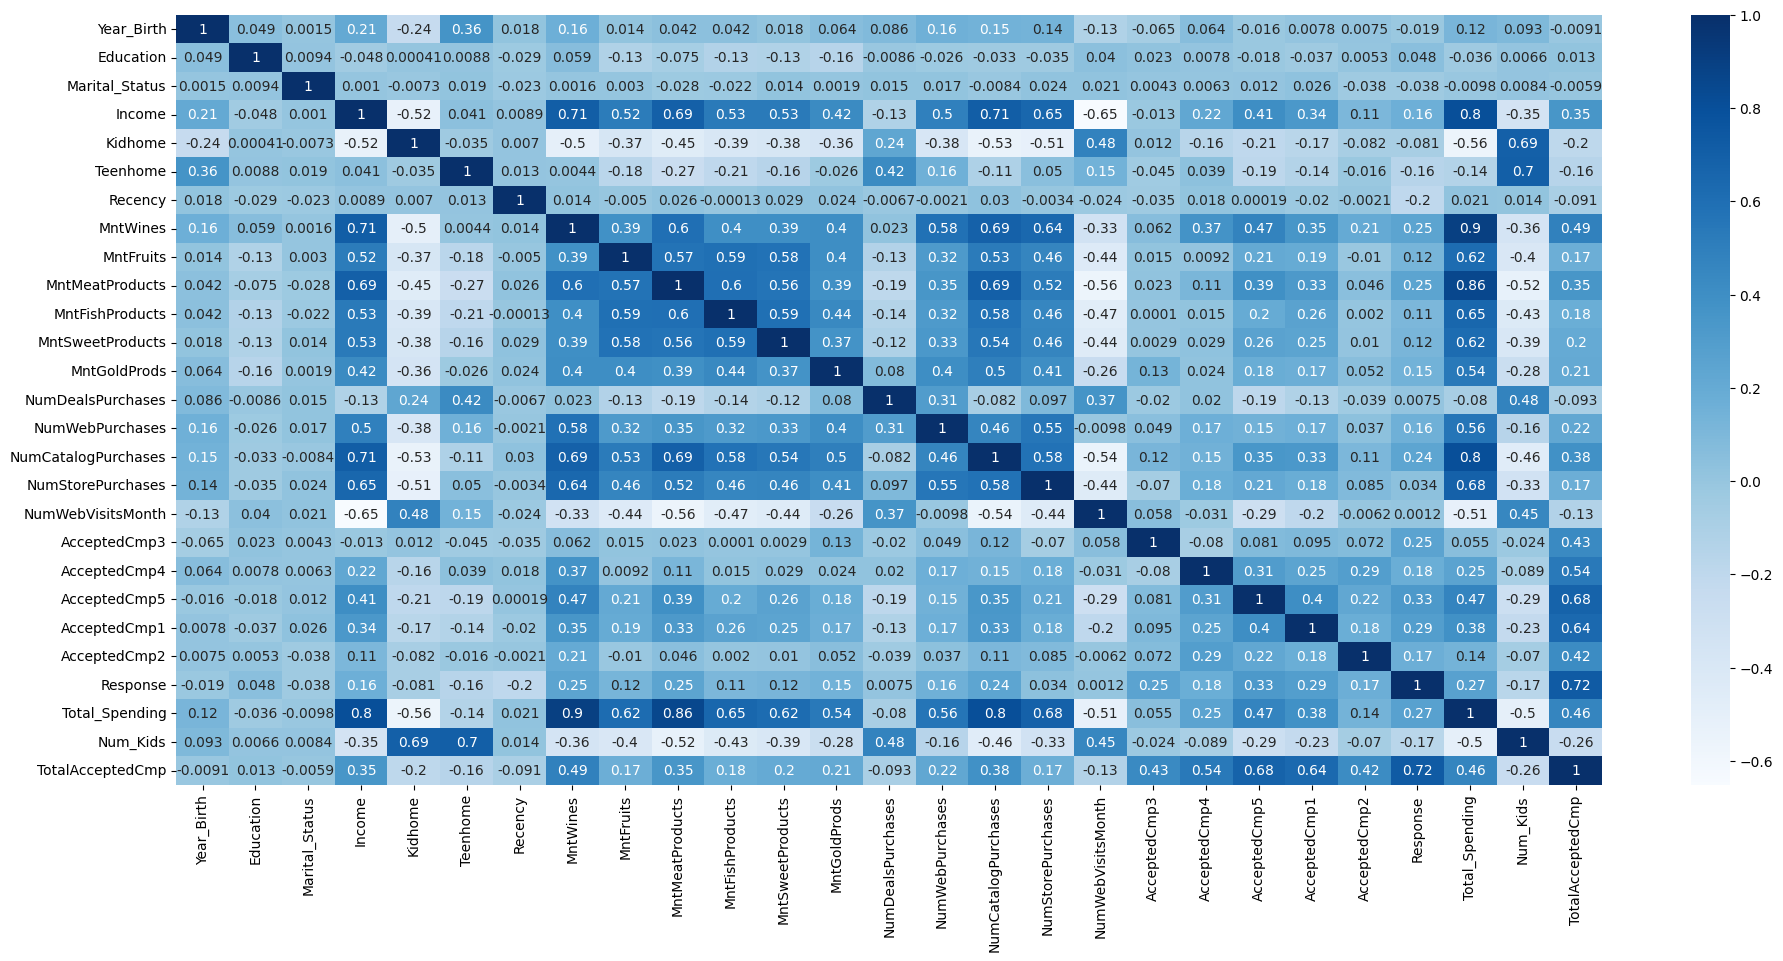

In [1224]:
fig = plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), cmap='Blues', annot=True);


In [1225]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Total_Spending', 'Num_Kids', 'TotalAcceptedCmp'],
      dtype='object')

## Numero de Componentes

In [1226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year_Birth           2219 non-null   int64
 1   Education            2219 non-null   int64
 2   Marital_Status       2219 non-null   int64
 3   Income               2219 non-null   int64
 4   Kidhome              2219 non-null   int64
 5   Teenhome             2219 non-null   int64
 6   Recency              2219 non-null   int64
 7   MntWines             2219 non-null   int64
 8   MntFruits            2219 non-null   int64
 9   MntMeatProducts      2219 non-null   int64
 10  MntFishProducts      2219 non-null   int64
 11  MntSweetProducts     2219 non-null   int64
 12  MntGoldProds         2219 non-null   int64
 13  NumDealsPurchases    2219 non-null   int64
 14  NumWebPurchases      2219 non-null   int64
 15  NumCatalogPurchases  2219 non-null   int64
 16  NumStorePurchases    2219 non

# Set Train y testing

In [1227]:
x,y = df, df
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#datos nromalizados, se visualiza el area bajo la curva

# PCA

In [1228]:
#number of compoenents
pca =  PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [1229]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl))

[0.31226023 0.0965778  0.09224533 0.05282958 0.04413743 0.03948362
 0.03828596 0.0373912  0.03585433 0.02873723 0.02675105 0.02419973
 0.02166803 0.02083067 0.0192347  0.01864546 0.01601131 0.01541708
 0.01334666 0.01286212]
suma: 0.9667695387423284


## Graficar el acumulado de varianza explicada en las nuevas dimensiones

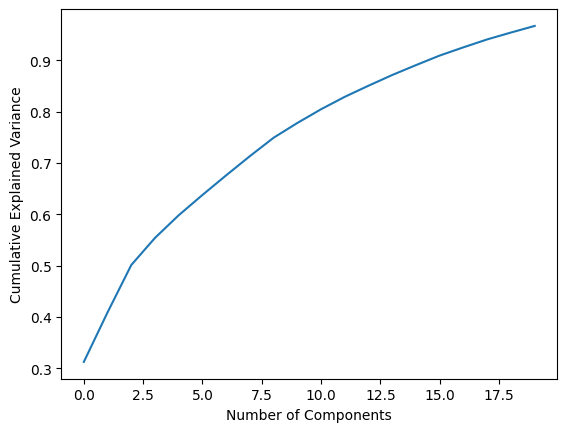

In [1230]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [1231]:
n_components = 17
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
df_pca = pd.DataFrame(X_train_pca, columns = ["PC{}".format(i) for i in range(1, n_components +1)])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,19625.253663,-32.468458,261.327755,-116.426105,-101.353584,90.644508,50.202778,-60.347534,-10.997878,-2.770751,1.567436,1.868959,1.671589,0.983560,-0.121058,1.394211,0.682869
1,-41063.937902,-516.194510,62.082526,-4.902936,2.799222,-3.905247,-30.169671,-7.255151,8.353422,0.516341,1.489109,0.946473,1.107776,0.028455,0.504447,-0.826370,0.761658
2,19402.896824,653.050754,43.374481,-103.475902,106.218867,6.863597,-36.301673,-1.806299,1.474238,-2.596583,1.857189,-2.645927,0.455299,0.211947,-1.113790,0.640367,0.286107
3,25158.863484,73.156536,-96.697649,-40.556937,-81.467466,23.602583,11.869513,21.965640,-1.711426,1.565285,2.136295,-3.632422,2.601212,0.597103,1.289540,-0.705509,-0.966519
4,17445.294621,-206.214442,-286.585054,11.192773,-20.314706,-2.201967,1.823838,-2.207113,15.408750,4.621331,2.727831,-0.706045,0.952756,-2.979047,-0.613038,-0.839369,-0.968356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,-17358.346597,186.417174,15.137447,24.772633,-5.568171,4.482851,45.227813,8.255694,15.169367,-2.529979,2.395560,0.024437,0.716269,-0.059926,0.308331,-0.862083,0.497362
1549,-23695.341716,27.147273,25.174266,5.725803,-9.057008,-0.447360,-0.363518,-1.043992,-24.927354,-2.928826,2.365769,-0.230110,-0.657517,-1.177517,0.659326,2.163702,0.334703
1550,26882.148963,-276.307450,-131.563814,-180.442773,60.098611,62.956088,3.492267,-72.377061,-12.554657,-3.371483,-2.209180,3.213337,-0.759027,-1.933598,-1.955178,1.490907,-0.637122
1551,30431.378384,360.080706,196.323881,3.340392,-24.800806,59.500720,40.356595,0.746181,-4.940006,-2.016646,-2.851575,-0.244151,0.703283,0.889385,-0.095419,0.440444,-0.609133


In [1232]:
len(X_train_pca)

1553

In [1233]:
len(X_test_pca)

666

# Kmeans++

## Elbow Method

In [1234]:
from sklearn.cluster import KMeans

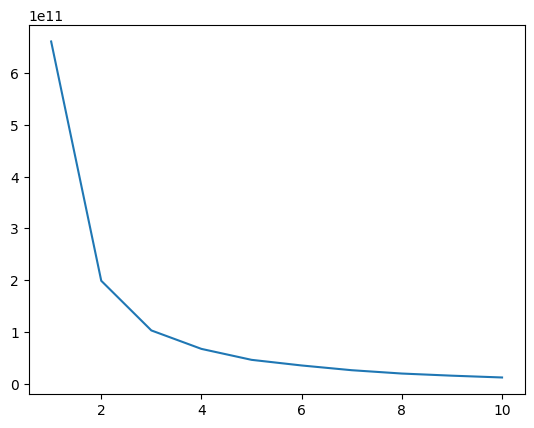

In [1235]:
X_pca_plus = df_pca[["PC{}".format(i) for i in range(1, n_components +1)]]
X_pca_ramdon = df_pca[["PC{}".format(i) for i in range(1, n_components +1)]]
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=20, random_state=0)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse)
plt.show() 

## init = 'K-means++'

In [1236]:
# Predicting the clusters
n_clusters_ = 3
kmeans_ = KMeans(n_clusters=n_clusters_, init='k-means++', max_iter=500, n_init=20, random_state=0)
labels = kmeans_.fit(X_train_pca)
y_kmeans = kmeans_.fit_predict(X_train_pca)
C = kmeans_.cluster_centers_
C

array([[ 2.44330643e+04, -1.19437267e+02,  3.44368707e+01,
        -4.27337964e-01, -5.48551937e+00, -3.05701670e-01,
         8.21584808e-01, -2.95223902e-03,  9.01028392e-01,
        -4.72322314e-01, -1.43872690e-01, -1.90506130e-01,
         9.41076071e-02, -1.21378504e-01,  3.82341249e-02,
         6.11429759e-03, -2.07323754e-02],
       [-2.30697086e+04, -3.29862067e+01,  2.87303619e+01,
         2.97892560e+00, -4.00146785e+00, -1.10227084e+00,
         9.56399385e-01, -2.03546532e-01,  1.11954449e+00,
        -6.17470121e-01, -2.57954812e-02,  7.31359603e-02,
        -6.30970774e-02, -8.72597874e-02,  1.18621705e-01,
        -8.27341449e-03,  5.45829252e-02],
       [ 5.73174337e+02,  1.30788894e+02, -5.53249440e+01,
        -2.37045722e+00,  8.28577903e+00,  1.26762761e+00,
        -1.56826515e+00,  1.89039737e-01, -1.78467570e+00,
         9.63579679e-01,  1.44771089e-01,  9.33601248e-02,
        -2.14012680e-02,  1.82166006e-01, -1.40909014e-01,
         2.43499968e-03, -3.2

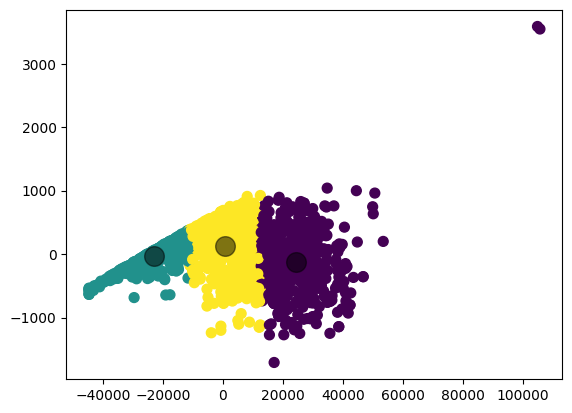

In [1237]:
centers = C
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [1238]:
X_pca_plus['labels']= y_kmeans
X_pca_plus

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,labels
0,19625.253663,-32.468458,261.327755,-116.426105,-101.353584,90.644508,50.202778,-60.347534,-10.997878,-2.770751,1.567436,1.868959,1.671589,0.983560,-0.121058,1.394211,0.682869,0
1,-41063.937902,-516.194510,62.082526,-4.902936,2.799222,-3.905247,-30.169671,-7.255151,8.353422,0.516341,1.489109,0.946473,1.107776,0.028455,0.504447,-0.826370,0.761658,1
2,19402.896824,653.050754,43.374481,-103.475902,106.218867,6.863597,-36.301673,-1.806299,1.474238,-2.596583,1.857189,-2.645927,0.455299,0.211947,-1.113790,0.640367,0.286107,0
3,25158.863484,73.156536,-96.697649,-40.556937,-81.467466,23.602583,11.869513,21.965640,-1.711426,1.565285,2.136295,-3.632422,2.601212,0.597103,1.289540,-0.705509,-0.966519,0
4,17445.294621,-206.214442,-286.585054,11.192773,-20.314706,-2.201967,1.823838,-2.207113,15.408750,4.621331,2.727831,-0.706045,0.952756,-2.979047,-0.613038,-0.839369,-0.968356,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,-17358.346597,186.417174,15.137447,24.772633,-5.568171,4.482851,45.227813,8.255694,15.169367,-2.529979,2.395560,0.024437,0.716269,-0.059926,0.308331,-0.862083,0.497362,1
1549,-23695.341716,27.147273,25.174266,5.725803,-9.057008,-0.447360,-0.363518,-1.043992,-24.927354,-2.928826,2.365769,-0.230110,-0.657517,-1.177517,0.659326,2.163702,0.334703,1
1550,26882.148963,-276.307450,-131.563814,-180.442773,60.098611,62.956088,3.492267,-72.377061,-12.554657,-3.371483,-2.209180,3.213337,-0.759027,-1.933598,-1.955178,1.490907,-0.637122,0
1551,30431.378384,360.080706,196.323881,3.340392,-24.800806,59.500720,40.356595,0.746181,-4.940006,-2.016646,-2.851575,-0.244151,0.703283,0.889385,-0.095419,0.440444,-0.609133,0


## init = 'Random'

In [1239]:
kmeans_random = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_random.fit(X_train_pca)
y_kmeans = kmeans_random.fit_predict(X_train_pca)
C = kmeans_random.cluster_centers_
C

array([[-2.30697086e+04, -3.29862067e+01,  2.87303619e+01,
         2.97892560e+00, -4.00146785e+00, -1.10227084e+00,
         9.56399385e-01, -2.03546532e-01,  1.11954449e+00,
        -6.17470121e-01, -2.57954812e-02,  7.31359603e-02,
        -6.30970774e-02, -8.72597874e-02,  1.18621705e-01,
        -8.27341449e-03,  5.45829252e-02],
       [ 5.73174337e+02,  1.30788894e+02, -5.53249440e+01,
        -2.37045722e+00,  8.28577903e+00,  1.26762761e+00,
        -1.56826515e+00,  1.89039737e-01, -1.78467570e+00,
         9.63579679e-01,  1.44771089e-01,  9.33601248e-02,
        -2.14012680e-02,  1.82166006e-01, -1.40909014e-01,
         2.43499968e-03, -3.25713028e-02],
       [ 2.44330643e+04, -1.19437267e+02,  3.44368707e+01,
        -4.27337964e-01, -5.48551937e+00, -3.05701670e-01,
         8.21584808e-01, -2.95223902e-03,  9.01028392e-01,
        -4.72322314e-01, -1.43872690e-01, -1.90506130e-01,
         9.41076071e-02, -1.21378504e-01,  3.82341249e-02,
         6.11429759e-03, -2.0

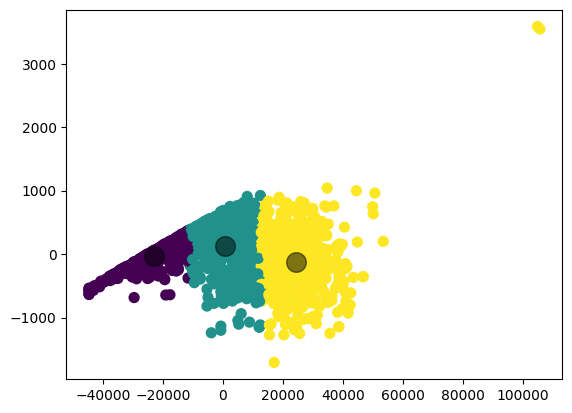

In [1240]:
centers = C
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [1241]:
X_pca_ramdon['labels']= kmeans_random.labels_
X_pca_ramdon

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,labels
0,19625.253663,-32.468458,261.327755,-116.426105,-101.353584,90.644508,50.202778,-60.347534,-10.997878,-2.770751,1.567436,1.868959,1.671589,0.983560,-0.121058,1.394211,0.682869,2
1,-41063.937902,-516.194510,62.082526,-4.902936,2.799222,-3.905247,-30.169671,-7.255151,8.353422,0.516341,1.489109,0.946473,1.107776,0.028455,0.504447,-0.826370,0.761658,0
2,19402.896824,653.050754,43.374481,-103.475902,106.218867,6.863597,-36.301673,-1.806299,1.474238,-2.596583,1.857189,-2.645927,0.455299,0.211947,-1.113790,0.640367,0.286107,2
3,25158.863484,73.156536,-96.697649,-40.556937,-81.467466,23.602583,11.869513,21.965640,-1.711426,1.565285,2.136295,-3.632422,2.601212,0.597103,1.289540,-0.705509,-0.966519,2
4,17445.294621,-206.214442,-286.585054,11.192773,-20.314706,-2.201967,1.823838,-2.207113,15.408750,4.621331,2.727831,-0.706045,0.952756,-2.979047,-0.613038,-0.839369,-0.968356,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,-17358.346597,186.417174,15.137447,24.772633,-5.568171,4.482851,45.227813,8.255694,15.169367,-2.529979,2.395560,0.024437,0.716269,-0.059926,0.308331,-0.862083,0.497362,0
1549,-23695.341716,27.147273,25.174266,5.725803,-9.057008,-0.447360,-0.363518,-1.043992,-24.927354,-2.928826,2.365769,-0.230110,-0.657517,-1.177517,0.659326,2.163702,0.334703,0
1550,26882.148963,-276.307450,-131.563814,-180.442773,60.098611,62.956088,3.492267,-72.377061,-12.554657,-3.371483,-2.209180,3.213337,-0.759027,-1.933598,-1.955178,1.490907,-0.637122,2
1551,30431.378384,360.080706,196.323881,3.340392,-24.800806,59.500720,40.356595,0.746181,-4.940006,-2.016646,-2.851575,-0.244151,0.703283,0.889385,-0.095419,0.440444,-0.609133,2


<Axes: xlabel='PC1', ylabel='PC2'>

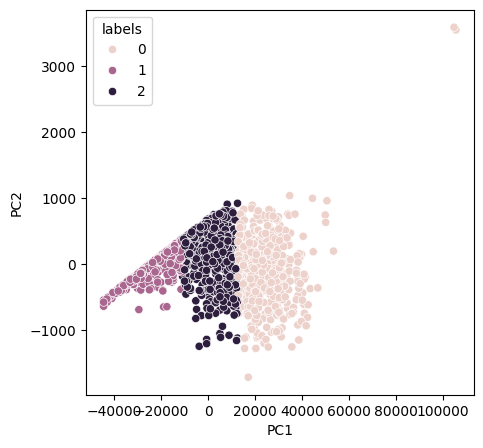

In [1242]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=X_pca_plus, x="PC1", y="PC2", ax=ax, hue="labels")

# SVM

In [1243]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [1244]:
X = X_pca_plus[["PC{}".format(i) for i in range(1, n_components +1)]].values
y = X_pca_plus.labels
y

0       0
1       1
2       0
3       0
4       0
       ..
1548    1
1549    1
1550    0
1551    0
1552    0
Name: labels, Length: 1553, dtype: int32

In [1245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [1246]:
#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [1247]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9978540772532188


# Create dataframe with predict values

In [1248]:
#y_pred
#X_test
df_predict = pd.DataFrame(X_test, columns = ["PC{}".format(i) for i in range(1, n_components +1)])
df_predict['labels'] = y_pred
df_predict

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,labels
0,-1353.227459,545.153567,-45.584165,29.808134,0.128599,1.837819,-14.238944,-1.278822,-11.680211,-1.282665,-2.473423,0.587683,-1.356742,-0.922198,1.031222,-1.008691,0.719946,2
1,-30071.645389,-158.888785,32.083516,10.788712,-6.732261,-1.469583,-1.222984,-2.269632,9.708575,-0.165204,2.376687,-0.257743,-0.142766,-0.368466,0.582984,-0.707143,-0.287480,1
2,-20732.262058,100.732178,18.578906,17.595321,-6.560628,3.212907,23.680044,5.058512,5.593722,-1.181383,-2.333585,1.621996,0.007380,0.901290,1.443433,-0.728108,-0.820073,1
3,17635.615160,-62.615074,-143.282353,35.211698,4.897276,28.984614,35.935078,17.111312,-13.561680,1.142527,2.188122,-2.613772,2.777503,-0.591031,0.468502,1.112510,-0.886103,0
4,-13396.584198,2.699808,99.712309,-101.548013,-10.379002,13.131780,-31.772876,-1.109123,17.909228,3.245297,2.591039,0.122110,-1.047822,2.394424,-0.246996,0.676611,0.489618,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,28075.551399,-214.135474,-276.581581,67.028274,-31.747123,15.171296,35.829715,4.862074,31.024160,-2.376176,1.972032,-3.098682,0.495561,1.274525,3.716503,-1.218686,1.979324,0
462,-21606.688638,30.422033,-2.104452,15.303315,-3.012990,2.080697,32.370422,5.078265,12.429000,-1.976809,-2.737738,-0.372677,0.517162,-0.105450,0.136605,0.168530,-0.388642,1
463,22939.206630,262.897482,124.273703,-218.531848,1.925302,21.772559,18.522459,-57.215517,8.724669,-1.835738,-0.105847,-3.898286,1.962366,1.136605,1.101408,0.837158,-0.207643,0
464,-35548.397039,-314.796772,48.844458,-6.891045,-10.755725,-6.704059,8.696185,-6.127139,2.979480,0.399833,2.433914,-0.567178,0.364613,-0.036950,-1.001250,-0.815951,0.022979,1


In [1249]:
len(x)

2219

In [1250]:
#Relacion
#X_pca_ramdon.loc[X_pca_ramdon['labels' == 1]]

#X_pca_plus
df_plus = df_predict.loc[(df_predict['labels'] == 0) | (df_predict['labels'] == 1)]
X_1 = df_plus[["PC{}".format(i) for i in range(1, n_components +1)]].values
y_1 = df_plus.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Rectaaradora')

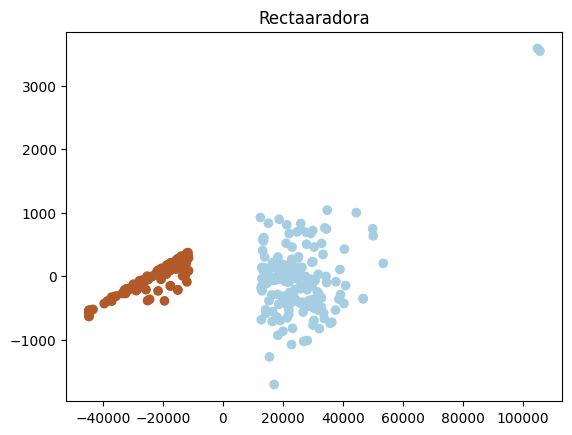

In [1251]:
#Relacion entre grupo 0 y grupo 1
#Se muestra como se comporta despues del SVM
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Rectaaradora')

In [1252]:
df_plus = df_predict.loc[(df_predict['labels'] == 1) | (df_predict['labels'] == 2)]
X_1 = df_plus[["PC{}".format(i) for i in range(1, n_components +1)]].values
y_1 = df_plus.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Rectaaradora')

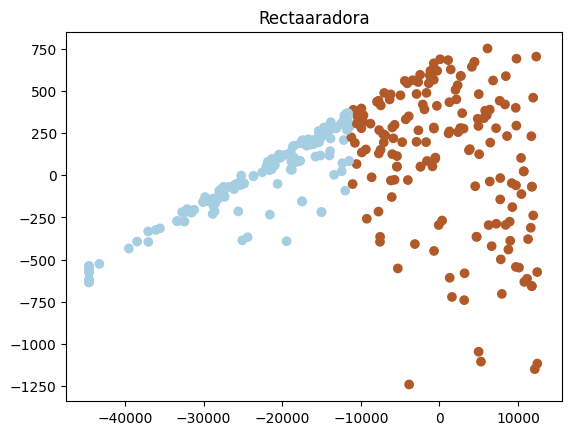

In [1253]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Rectaaradora')

In [1254]:
df_plus = df_predict.loc[(df_predict['labels'] == 2) | (df_predict['labels'] == 0)]
X_1 = df_plus[["PC{}".format(i) for i in range(1, n_components +1)]].values
y_1 = df_plus.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Rectaaradora')

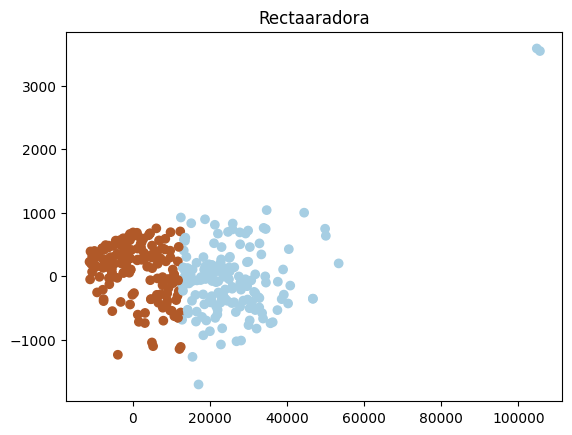

In [1255]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Rectaaradora')

<Axes: xlabel='PC1', ylabel='PC3'>

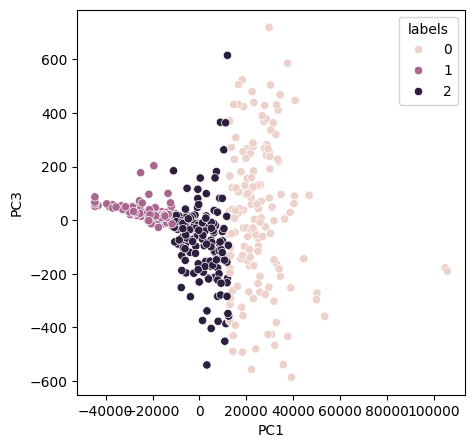

In [1256]:
#Dispersion de datos
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_predict, x="PC1", y="PC3", ax=ax, hue="labels")

# Pickle

In [1257]:
import pickle

In [1258]:
pickle_file_pca = 'pca_model_integrador.plk'
with open(pickle_file_pca,'wb') as file:
    pickle.dump(pca, file)
    
pickle_file_kmeans = 'kmeans_model_integrador.plk'
with open(pickle_file_kmeans,'wb') as file:
    pickle.dump(kmeans_,file)
    
pickle_file_svm = 'svm_model_integrador.plk'
with open(pickle_file_svm,'wb') as file:
    pickle.dump(clf_svm,file)

In [1259]:
#PCA
with open(pickle_file_pca,'rb') as file:
    pickle_pca = pickle.load(file)
X_PCA = pickle_pca.transform(df)
len(X_PCA)

2219

In [1260]:
#SVM 
with open(pickle_file_svm,'rb') as file:
    pickle_svm = pickle.load(file)
X_SVM = pickle_svm.predict(X_PCA)
X_SVM

array([2, 2, 0, ..., 2, 0, 2])

In [1261]:
df['labels'] = X_SVM

In [1262]:
df.to_csv('./Datasets/marketing_campaign_classified.csv')

In [1263]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Spending,Num_Kids,TotalAcceptedCmp,labels
0,66,0,1,58138,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,0,1,2
1,69,0,1,46344,1,1,38,11,1,6,...,0,0,0,0,0,0,27,2,0,2
2,58,0,0,71613,0,0,26,426,49,127,...,0,0,0,0,0,0,776,0,0,0
3,39,0,0,26646,1,0,26,11,4,20,...,0,0,0,0,0,0,53,1,0,1
4,42,2,5,58293,1,0,94,173,43,118,...,0,0,0,0,0,0,422,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,0,5,61223,0,1,46,709,43,182,...,0,0,0,0,0,0,1341,1,0,2
2236,77,2,0,64014,2,1,56,406,0,30,...,0,0,0,1,0,0,444,3,1,2
2237,42,0,2,56981,0,0,91,908,48,217,...,0,1,0,0,0,0,1241,0,1,2
2238,67,1,0,69245,0,1,8,428,30,214,...,0,0,0,0,0,0,843,1,0,0


# Nuevo Analisis Multivariado

<Axes: xlabel='Income', ylabel='Total_Spending'>

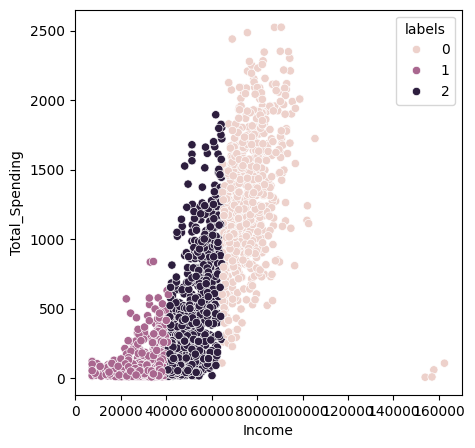

In [1264]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Income", y="Total_Spending", ax=ax, hue="labels")

In [1265]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Total_Spending', 'Num_Kids', 'TotalAcceptedCmp', 'labels'],
      dtype='object')

In [1266]:
#Longitud del Sépalo vs Especies
var = 'Education_Str'
var_title = 'Highest Level of Academic Degree'

labels = []
for value in df['Education']:
    if value == 0:
        labels.append('Graduation')
    elif value == 1:
        labels.append('Master')
    elif value == 2:
        labels.append('PhD')
    else:
        labels.append('Others')
        
df.insert(27, "Education_Str", labels, True)

labels = []
for value in df['Marital_Status']:
    if value == 5:
        labels.append('Married')
    elif value == 4:
        labels.append('Widow')
    elif value == 3:
        labels.append('Separated')
    elif value == 2:
        labels.append('Divorced')
    elif value == 1:
        labels.append('Single')
    else:
        labels.append('Others')
df.insert(28, "Marital_Status_Str", labels, True)

filter = (df['Response'] == 0)
df_pos_response = df.loc[filter]
    
filter = (df['Response'] == 1)
df_neg_response = df.loc[filter]

## Deals Purchases vs Labels

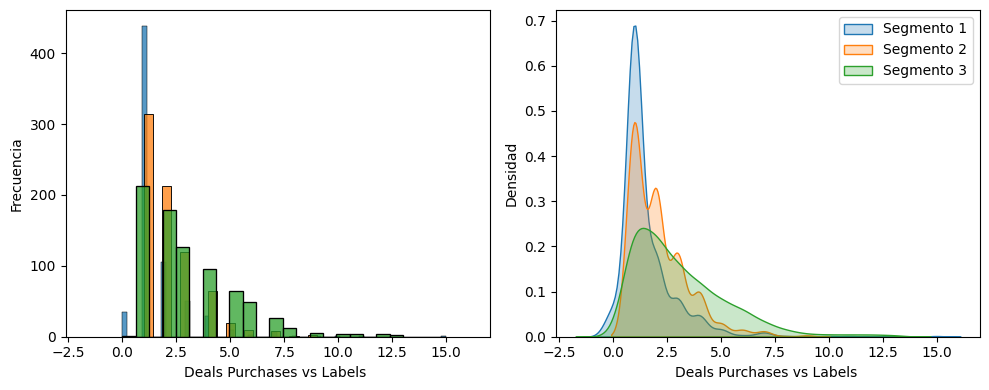

In [1267]:
#Longitud del Sépalo vs Especies
var = 'NumDealsPurchases'
var_title = 'Deals Purchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## NumWebPurchases vs labels

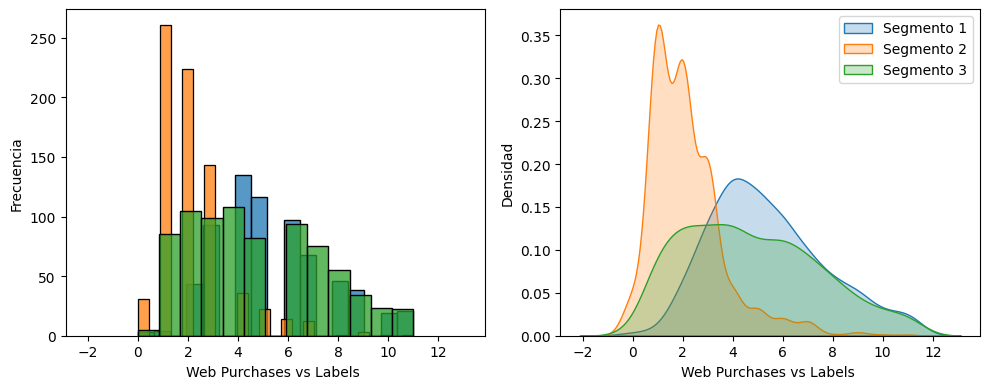

In [1268]:
#Longitud del Sépalo vs Especies
var = 'NumWebPurchases'
var_title = 'Web Purchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## NumCatalogPurchases vs labels

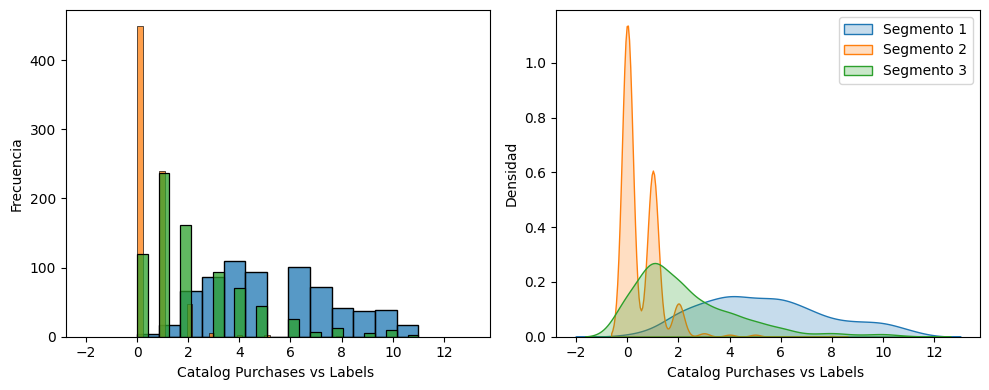

In [1269]:
#Longitud del Sépalo vs Especies
var = 'NumCatalogPurchases'
var_title = 'Catalog Purchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## NumStorePurchases vs labels

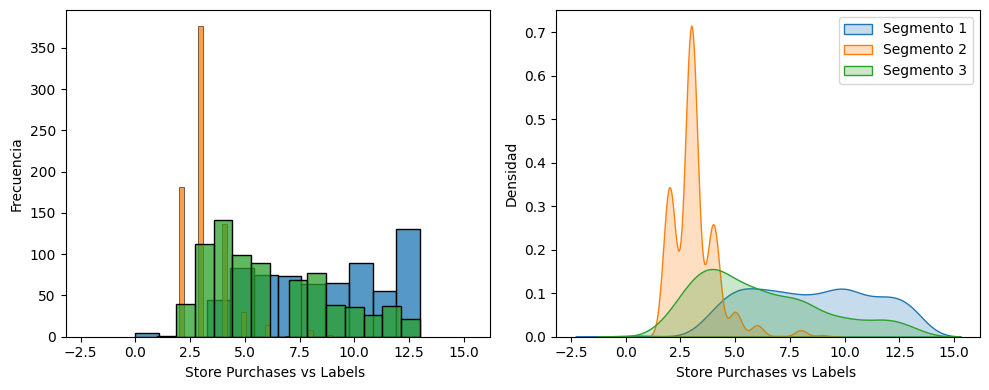

In [1270]:
#Longitud del Sépalo vs Especies
var = 'NumStorePurchases'
var_title = 'Store Purchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## NumWebVisitsMonth vs labels

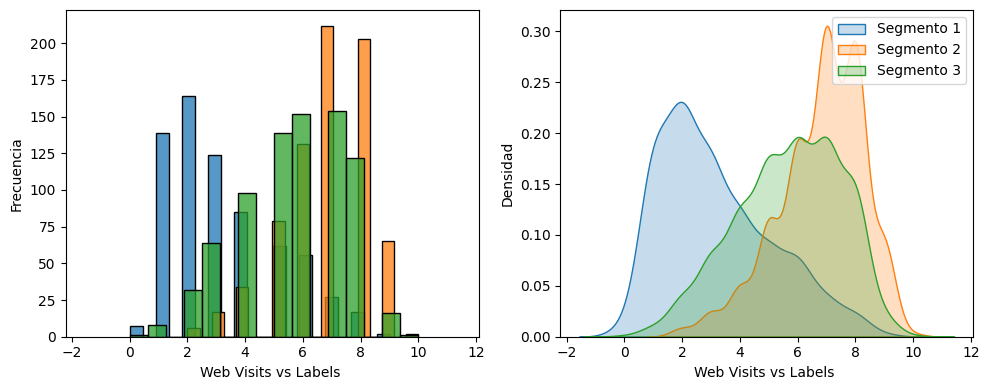

In [1271]:
#Longitud del Sépalo vs Especies
var = 'NumWebVisitsMonth'
var_title = 'Web Visits vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## Education vs labels

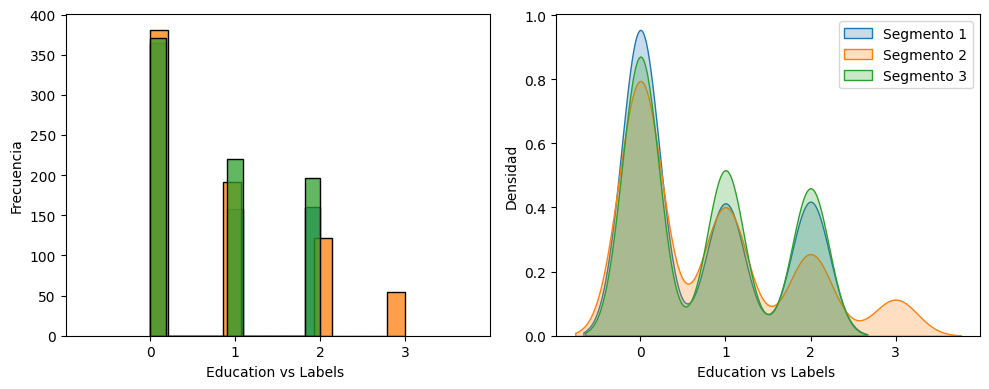

In [1272]:
#Longitud del Sépalo vs Especies
var = 'Education'
var_title = 'Education vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## Amount Spent on Products with Label 0

        Percentage
Wines     0.482828
Fruits    0.044457
Meat      0.306014
Fish      0.064934
Sweet     0.046902
Gold      0.054864


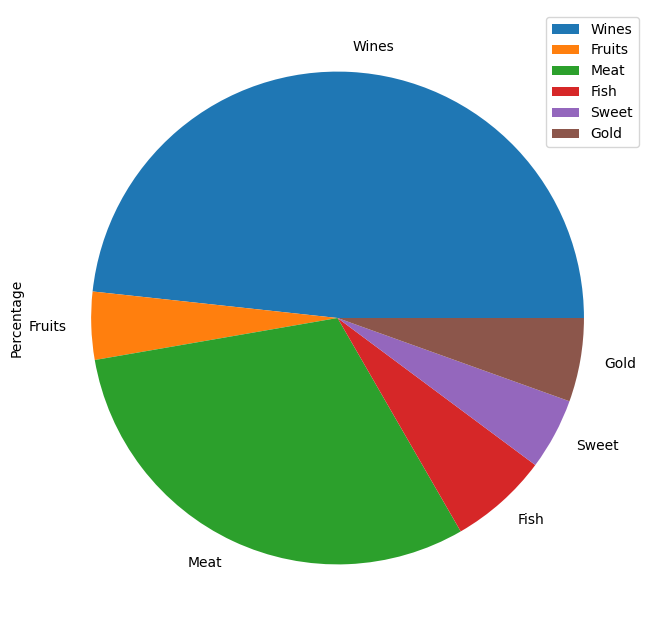

In [1273]:
#Longitud del Sépalo vs Especies
filter = (df['labels'] == 0)
df_graduate = df.loc[filter]

percentage_lst = []
wines_percentage = df_graduate["MntWines"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(wines_percentage)

fruits_percentage = df_graduate["MntFruits"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(fruits_percentage)

MeatProducts_percentage = df_graduate["MntMeatProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(MeatProducts_percentage)

FishProducts_percentage = df_graduate["MntFishProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(FishProducts_percentage)

SweetProducts_percentage = df_graduate["MntSweetProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(SweetProducts_percentage)

GoldProducts_percentage = df_graduate["MntGoldProds"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(GoldProducts_percentage)


amount_spent_df = pd.DataFrame(
    {
        'Percentage':percentage_lst},
        index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    )
print(amount_spent_df)
plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))

## Amount Spent on PRoducts with Label 1

        Percentage
Wines     0.344955
Fruits    0.064577
Meat      0.249349
Fish      0.096921
Sweet     0.064927
Gold      0.179272


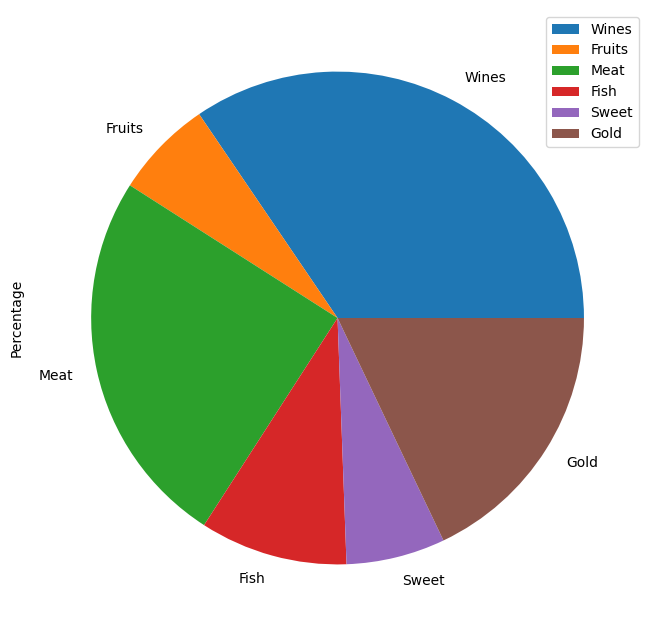

In [1274]:
#Longitud del Sépalo vs Especies
filter = (df['labels'] == 1)
df_graduate = df.loc[filter]

percentage_lst = []
wines_percentage = df_graduate["MntWines"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(wines_percentage)

fruits_percentage = df_graduate["MntFruits"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(fruits_percentage)

MeatProducts_percentage = df_graduate["MntMeatProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(MeatProducts_percentage)

FishProducts_percentage = df_graduate["MntFishProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(FishProducts_percentage)

SweetProducts_percentage = df_graduate["MntSweetProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(SweetProducts_percentage)

GoldProducts_percentage = df_graduate["MntGoldProds"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(GoldProducts_percentage)


amount_spent_df = pd.DataFrame(
    {
        'Percentage':percentage_lst},
        index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    )
print(amount_spent_df)
plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))

## Amount Spent on Products with Label 2

        Percentage
Wines     0.582094
Fruits    0.037999
Meat      0.202836
Fish      0.050445
Sweet     0.035851
Gold      0.090775


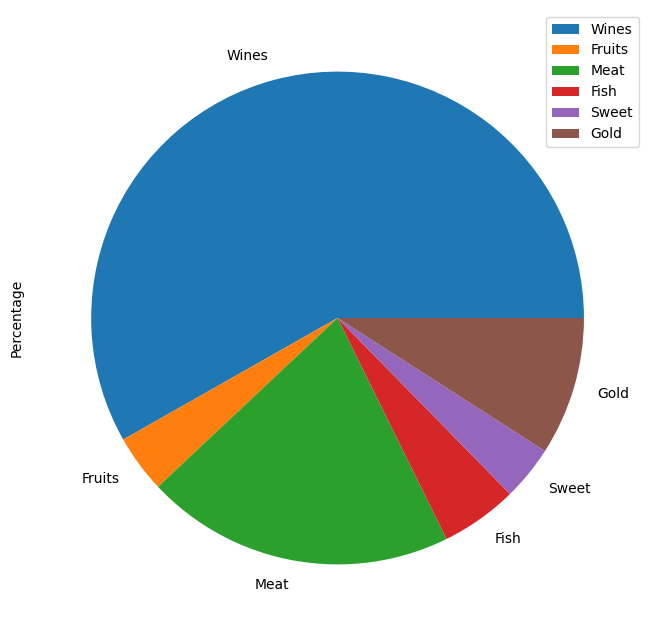

In [1275]:
#Longitud del Sépalo vs Especies
filter = (df['labels'] == 2)
df_graduate = df.loc[filter]

percentage_lst = []
wines_percentage = df_graduate["MntWines"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(wines_percentage)

fruits_percentage = df_graduate["MntFruits"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(fruits_percentage)

MeatProducts_percentage = df_graduate["MntMeatProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(MeatProducts_percentage)

FishProducts_percentage = df_graduate["MntFishProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(FishProducts_percentage)

SweetProducts_percentage = df_graduate["MntSweetProducts"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(SweetProducts_percentage)

GoldProducts_percentage = df_graduate["MntGoldProds"].sum() / df_graduate["Total_Spending"].sum()
percentage_lst.append(GoldProducts_percentage)


amount_spent_df = pd.DataFrame(
    {
        'Percentage':percentage_lst},
        index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    )
print(amount_spent_df)
plot = amount_spent_df.plot.pie(y='Percentage', figsize=(10, 8))